In [34]:
experiments = [
    "TestVnetRunnerABR/VariableAvailableCapacitySingleFlow",
    "TestVnetRunnerSimulcast/VariableAvailableCapacitySingleFlow",
    "TestVnetRunnerSimulcast/VariableAvailableCapacity3SimulcastTracks",
]

base_path = "../data"
config_path = "../vnet/config.yaml"

In [35]:
%run helpers.py

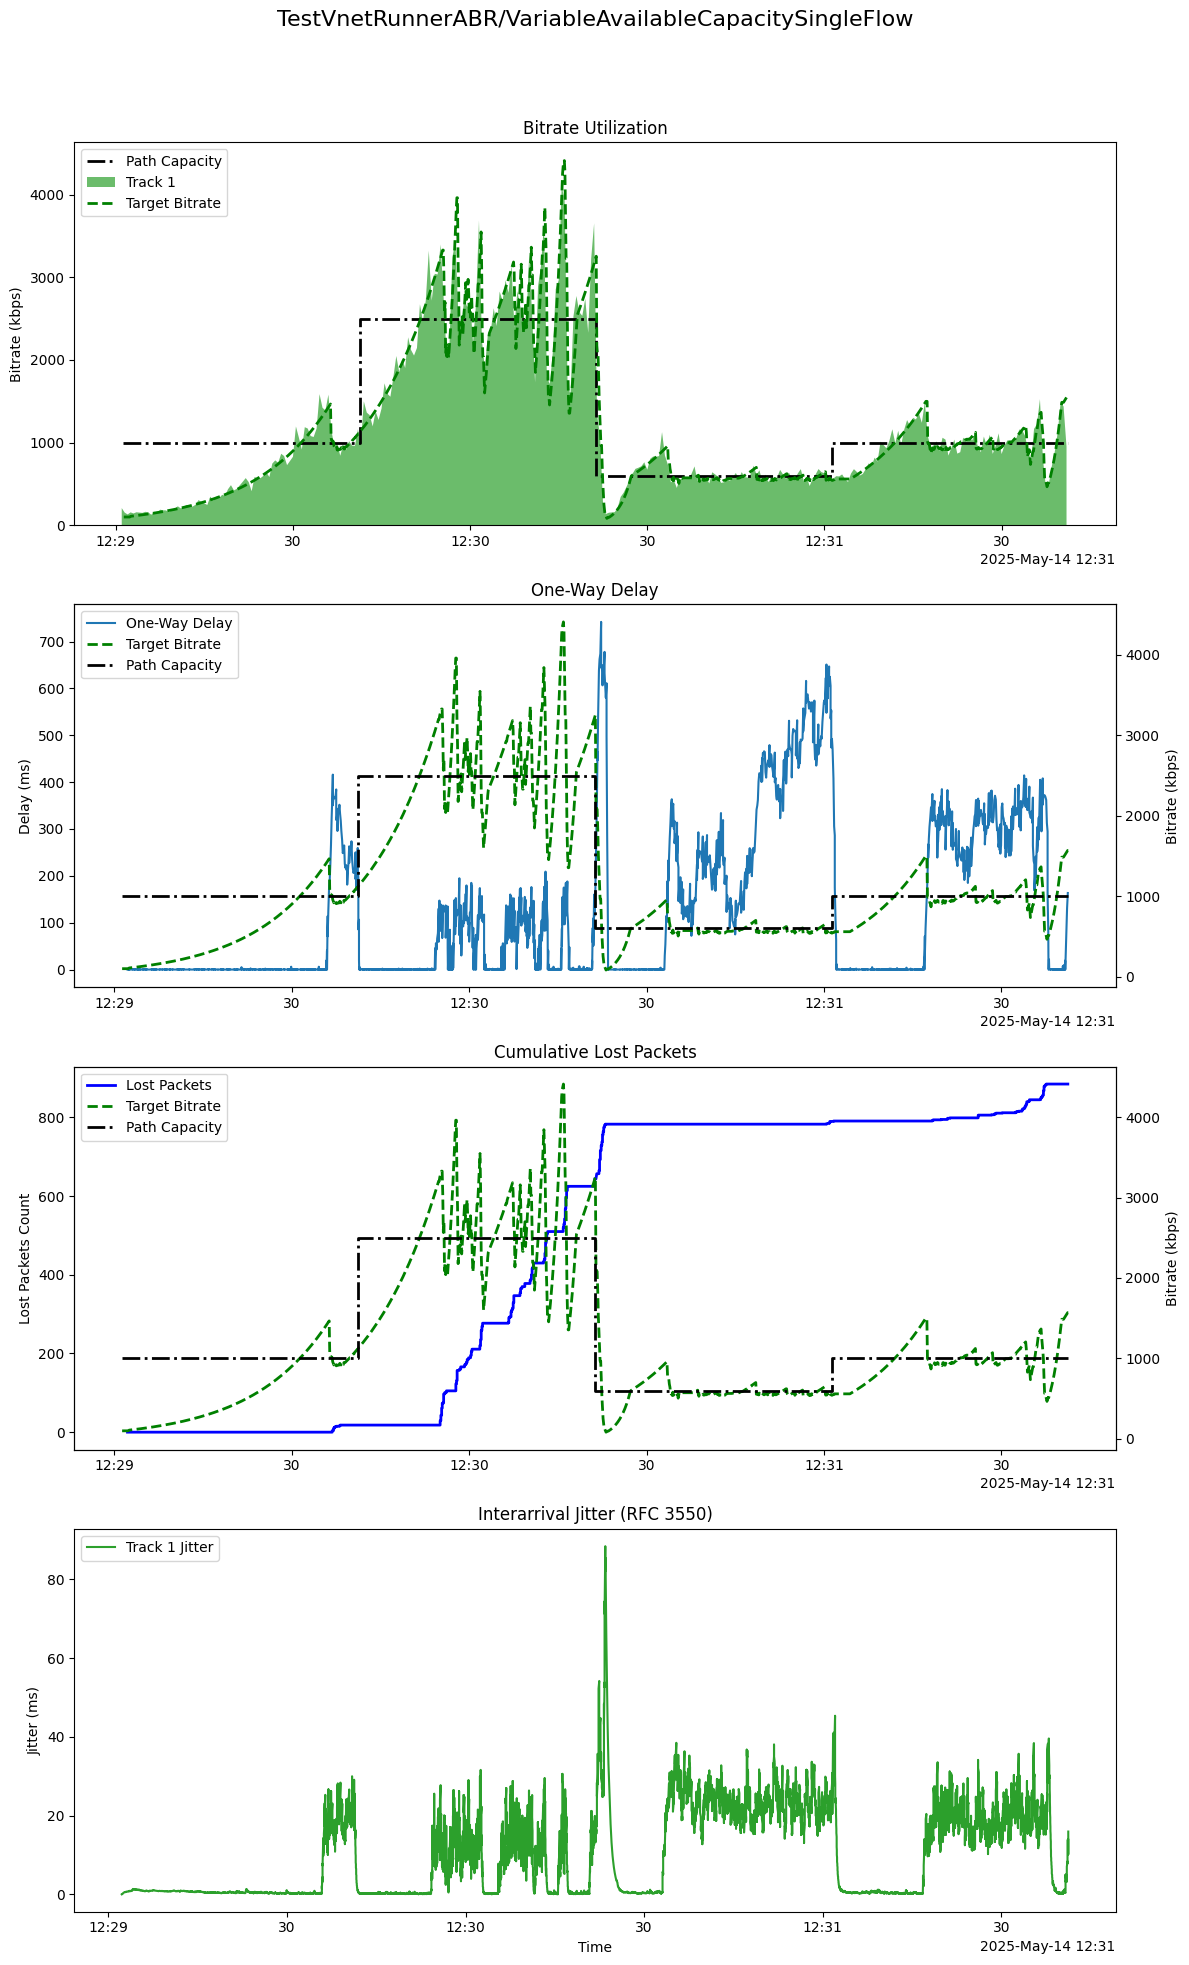

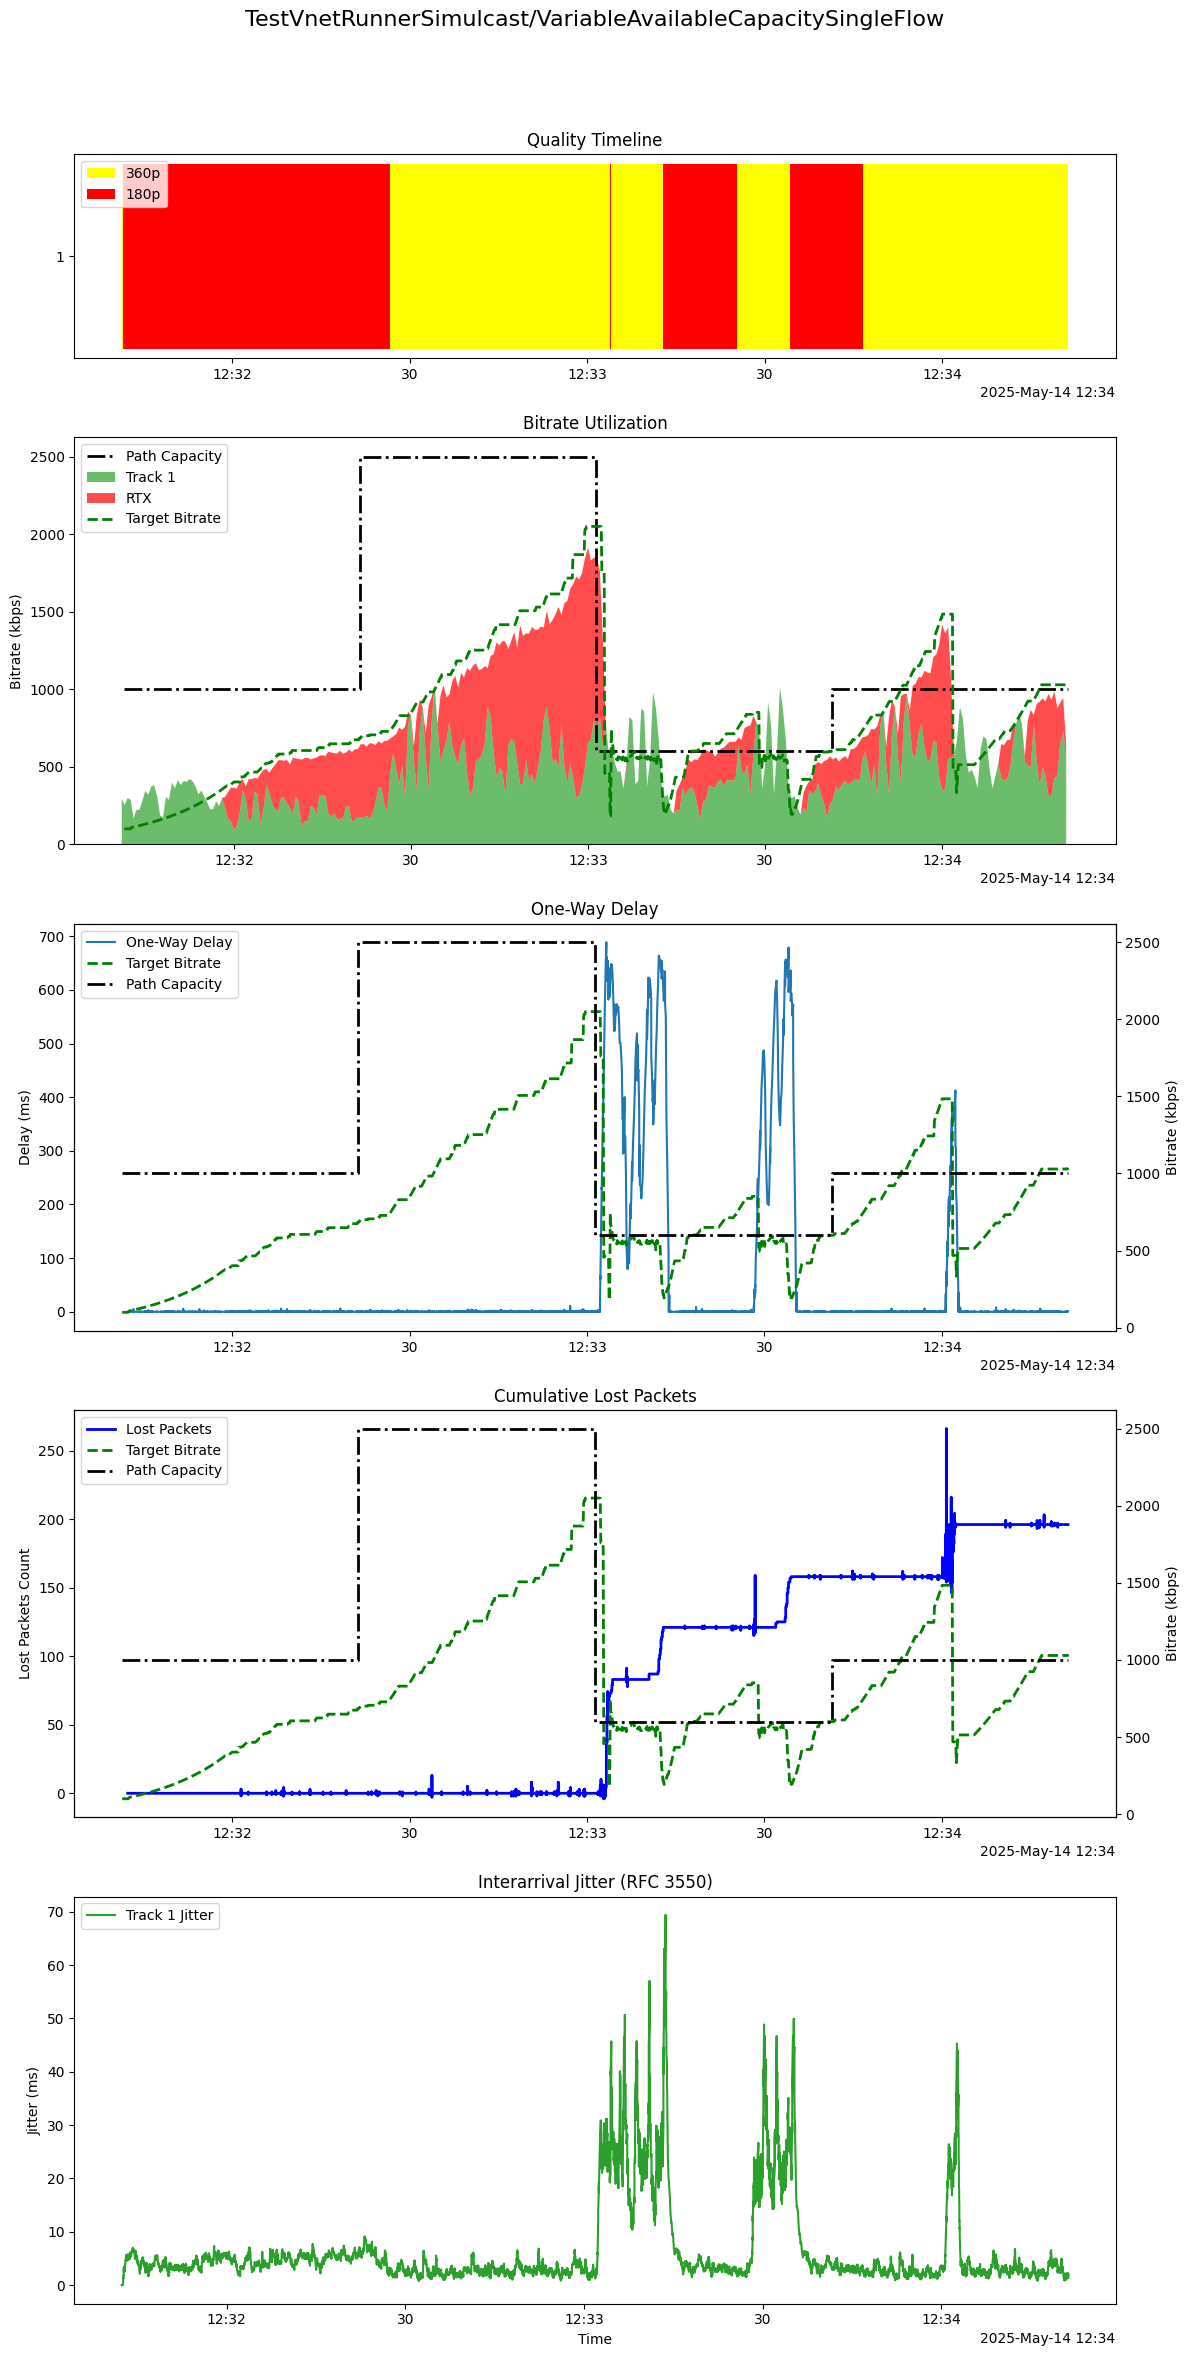

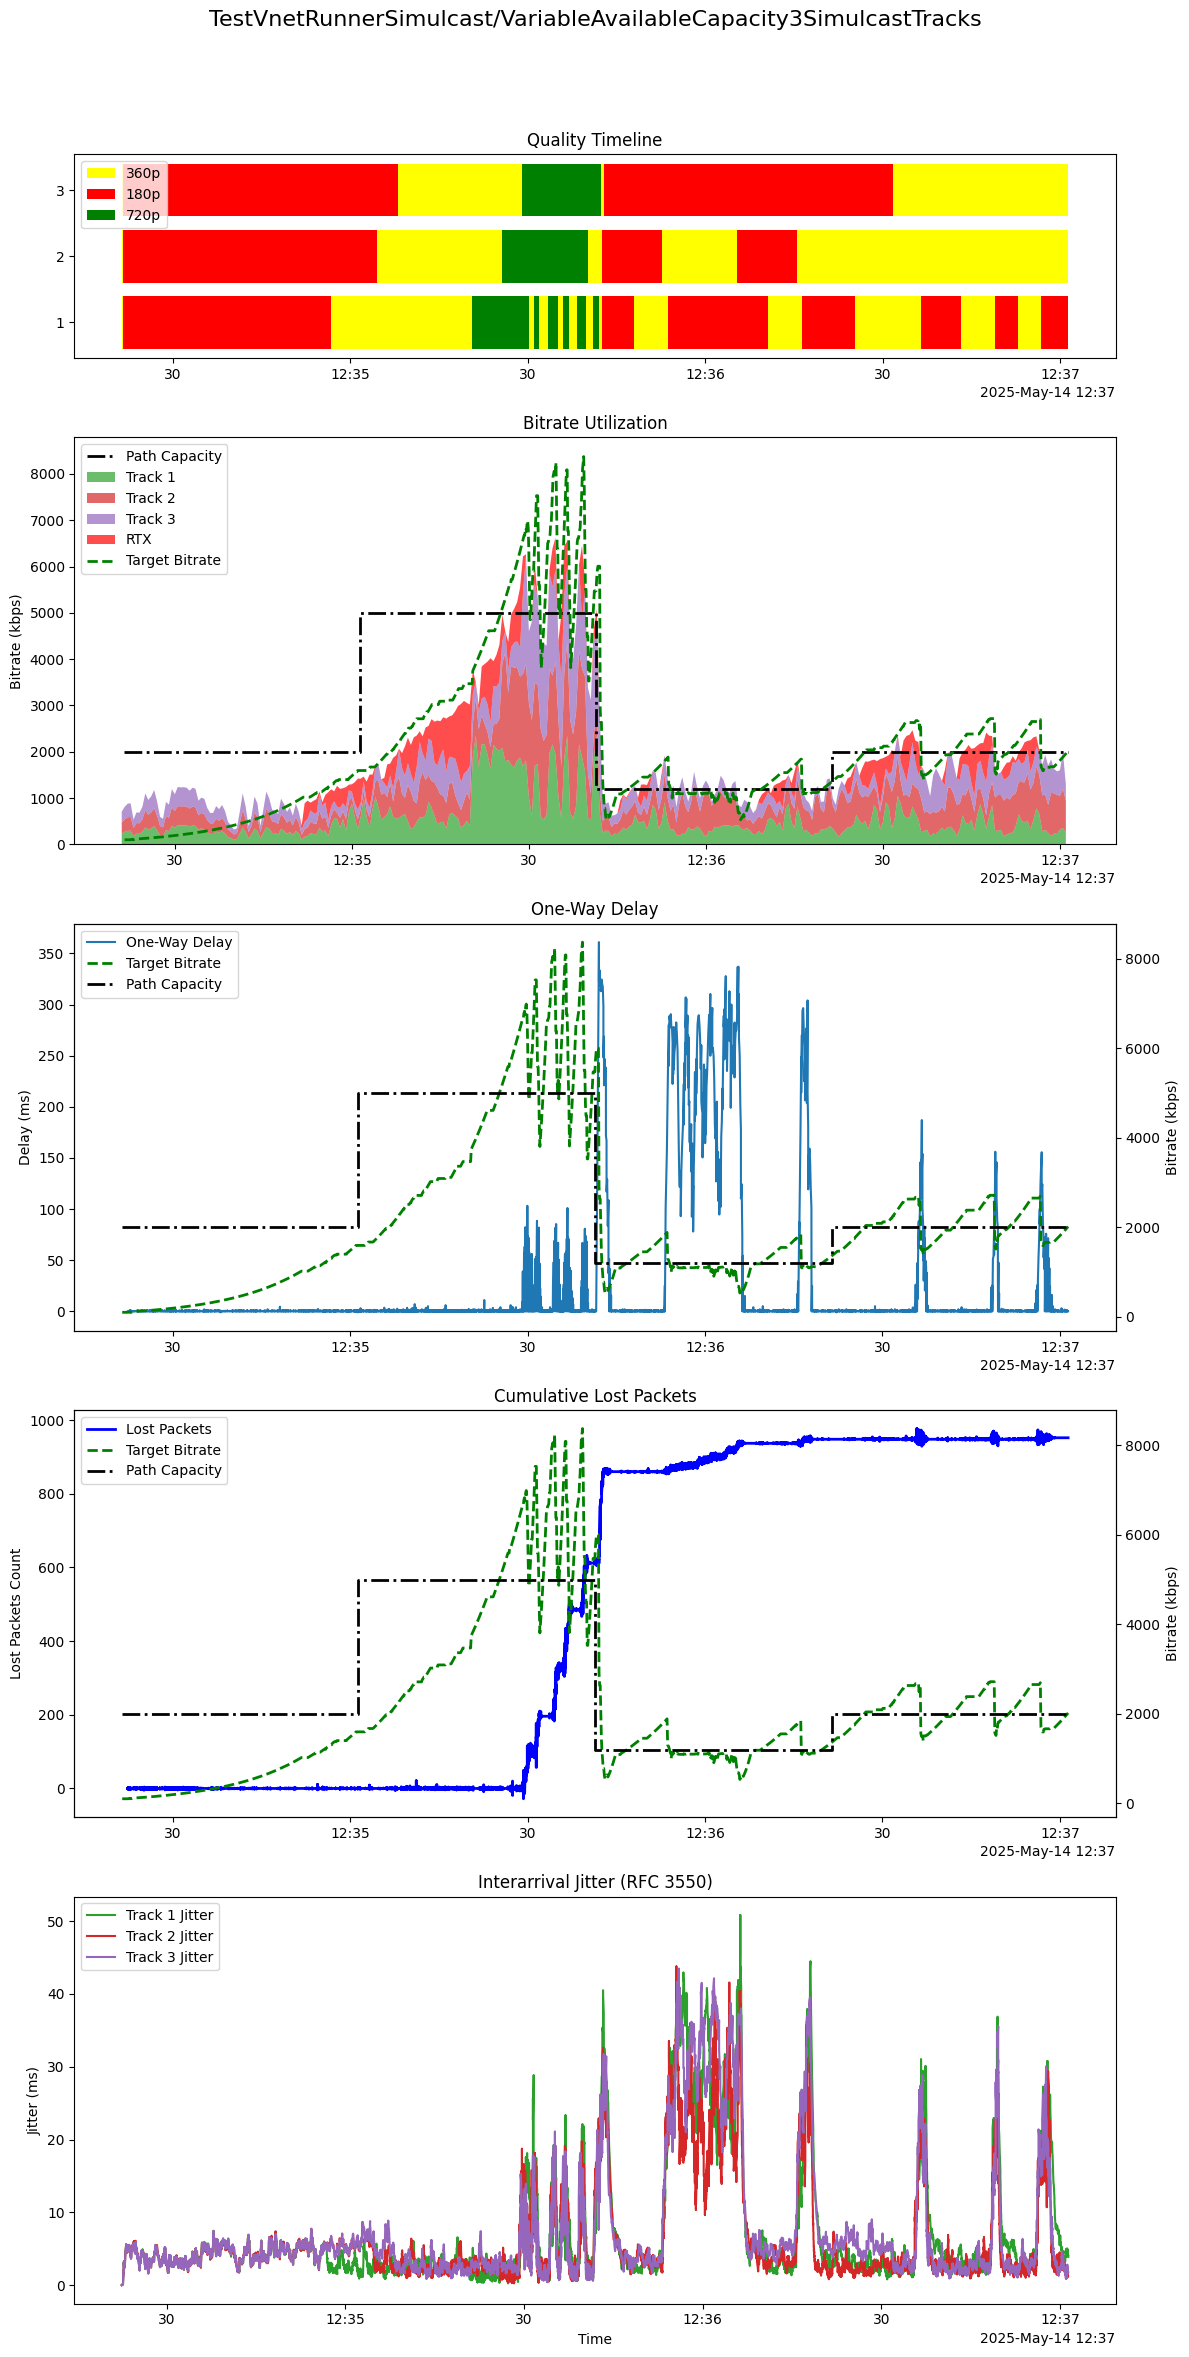

In [36]:
experiment_data = load_experiments_data(experiments, base_path)

config = load_config(config_path)
test_cases = config_to_test_cases(config)

path_characteristics_map = {}
for experiment in experiments:
    if experiment not in test_cases:
        print(f"Warning: No test case found for experiment {experiment}. Skipping path characteristics extraction.")
        continue
    test_case = test_cases[experiment]
    path_characteristics_map[experiment] = extract_path_characteristics(test_case, config)

compute_bitrates(experiment_data)
compute_lost_packets(experiment_data)
compute_interarrival_jitter(experiment_data)
compute_one_way_delay(experiment_data)
create_quality_timeline(experiment_data, config, test_cases)

plot_experiment_results(config, experiment_data, path_characteristics_map, test_cases)